# How to trace Machine Learning Techniques?

## Adaline
<img src="https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png" width="600">

    - This work is based in (https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html)

### Adaline class declaration



In [1]:
import sys
import logging
import pandas as pd
from importlib import reload

logging.basicConfig(stream=sys.stdout, format='', level=logging.INFO, datefmt=None)
import numpy as np

class Adaline(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        logging.info("STARTING TRAINING ...")

        self.w_ = np.zeros(1 + X.shape[1])
        logging.info("	W: {}".format(self.w_))

        self.cost_ = []
        for i in range(self.epochs):
            logging.info("  EPOCH: {}".format(i))
            
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0

            logging.info("	W: {}".format(self.w_))
            logging.info("      COST: {}".format(cost))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Main class declaration

 Data: [5.1 1.4] -- Class: -1
 Data: [4.9 1.4] -- Class: -1
 Data: [4.7 1.3] -- Class: -1
 Data: [4.6 1.5] -- Class: -1
 Data: [5.  1.4] -- Class: -1
 Data: [5.4 1.7] -- Class: -1
 Data: [4.6 1.4] -- Class: -1
 Data: [5.  1.5] -- Class: -1
 Data: [4.4 1.4] -- Class: -1
 Data: [4.9 1.5] -- Class: -1
 Data: [5.4 1.5] -- Class: -1
 Data: [4.8 1.6] -- Class: -1
 Data: [4.8 1.4] -- Class: -1
 Data: [4.3 1.1] -- Class: -1
 Data: [5.8 1.2] -- Class: -1
 Data: [5.7 1.5] -- Class: -1
 Data: [5.4 1.3] -- Class: -1
 Data: [5.1 1.4] -- Class: -1
 Data: [5.7 1.7] -- Class: -1
 Data: [5.1 1.5] -- Class: -1
 Data: [5.4 1.7] -- Class: -1
 Data: [5.1 1.5] -- Class: -1
 Data: [4.6 1. ] -- Class: -1
 Data: [5.1 1.7] -- Class: -1
 Data: [4.8 1.9] -- Class: -1
 Data: [5.  1.6] -- Class: -1
 Data: [5.  1.6] -- Class: -1
 Data: [5.2 1.5] -- Class: -1
 Data: [5.2 1.4] -- Class: -1
 Data: [4.7 1.6] -- Class: -1
 Data: [4.8 1.6] -- Class: -1
 Data: [5.4 1.5] -- Class: -1
 Data: [5.2 1.5] -- Class: -1
 Data: [5.

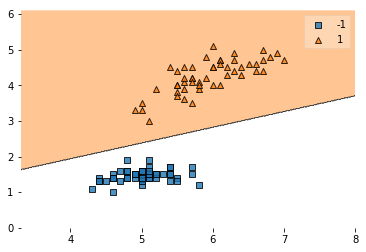

In [2]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
#from adaline import Adaline

logging.basicConfig(level=logging.DEBUG)

%matplotlib inline
df = pd.read_csv('../data/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

for x_,y_ in zip(X,y):
	logging.info(" Data: {} -- Class: {}".format(x_, y_))

#
ada = Adaline(epochs=50, eta=0.0001).train(X, y)
#plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
#plt.xlabel('Iterations')
#plt.ylabel('log(Sum-squared-error)')
#plt.title('Adaline - Learning rate 0.01')
#plt.show()

#
#ada = Adaline(epochs=50, eta=0.0001).train(X, y)
#plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
#plt.xlabel('Iterations')
#plt.ylabel('Sum-squared-error')
#plt.title('Adaline - Learning rate 0.0001')
#plt.show()

#
plot_decision_regions(X, y, clf=ada)
#plt.title('Adaline - Gradient Descent')
#plt.xlabel('sepal length [standardized]')
#plt.ylabel('petal length [standardized]')
#plt.show()


##  This Looks Like That (TLLT) [(reference)](https://arxiv.org/pdf/1806.10574.pdf)
<img src="tllt.png">